# AI1904 - ADY201m LAB 5
Hoàng Hữu Quang - HE194223

Trần Ngọc Hưng - HE194406

Bùi Văn Long - HE190896

Phan Kế Lân - HE194439

# Data scraping

In [4]:
# Importing libraries for data scraping
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd

In [5]:
# Let's choose some "random" website to try to get information
url = "https://webgia.com/"
response = requests.get(url)

if response.status_code == 200: # If the request was successful
    # First, take all the content of the site
    soup = BeautifulSoup(response.text, "html.parser")
    # Second, find all the <a> tags, which contain the links to other websites that maybe of help
    a_tag = soup.find_all("a")
    for txt in a_tag:
        # Use .text to get the text content of the <a> tag
        names = txt.text
        # Get the href attribute of the <a> tag
        fullLink = txt.get("href")
        print(names)
        print(fullLink)
else:
    print("Failed!")


WebGiá.com

https://webgia.com/
☰
#
Giá vàng 
https://webgia.com/gia-vang/
Giá vàng SJC
https://webgia.com/gia-vang/sjc/
Giá vàng DOJI
https://webgia.com/gia-vang/doji/
Giá vàng PNJ
https://webgia.com/gia-vang/pnj/
Bảo Tín Minh Châu
https://webgia.com/gia-vang/bao-tin-minh-chau/
Bảo Tín Mạnh Hải
https://webgia.com/gia-vang/bao-tin-manh-hai/
Giá vàng Phú Quý
https://webgia.com/gia-vang/phu-quy/
Giá vàng Mi Hồng
https://webgia.com/gia-vang/mi-hong/
Giá vàng Ngọc Thẩm
https://webgia.com/gia-vang/ngoc-tham/
Giá vàng thế giới
https://webgia.com/gia-vang/the-gioi/
Biểu đồ giá vàng SJC hôm nay
https://webgia.com/gia-vang/sjc/bieu-do-1-ngay.html
Biểu đồ giá vàng SJC 1 tháng
https://webgia.com/gia-vang/sjc/bieu-do-1-thang.html
Biểu đồ giá vàng SJC 3 tháng
https://webgia.com/gia-vang/sjc/bieu-do-3-thang.html
Biểu đồ giá vàng SJC 6 tháng
https://webgia.com/gia-vang/sjc/bieu-do-6-thang.html
Biểu đồ giá vàng SJC 1 năm
https://webgia.com/gia-vang/sjc/bieu-do-1-nam.html
Tỷ giá  ngân hàng 
https://we

We can see that in order to find the highest price of gold in the last 6 months, we'll have to use the link of "Biểu đồ giá vàng SJC 6 tháng", which is included in the result of the code cell above.

In [7]:
url = "https://webgia.com/gia-vang/sjc/bieu-do-6-thang.html"
response = requests.get(url)

if response.status_code == 200: # If the request was successful
    # Take all the content of the site
    soup = BeautifulSoup(response.text, "html.parser")

soup

<!DOCTYPE html>

<html lang="vi">
<head prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb# article: http://ogp.me/ns/article#">
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<!--[if IE]><meta http-equiv='X-UA-Compatible' content='IE=edge,chrome=1'><![endif]-->
<meta content="width=device-width,minimum-scale=1,initial-scale=1" name="viewport"/>
<title>Biểu đồ giá vàng SJC 6 tháng - từ ngày 25/04/2024 đến ngày 25/10/2024 - Web giá</title>
<meta content="Biểu đồ giá vàng miếng SJC từ ngày 25/04/2024 đến ngày 25/10/2024. Diến biến giá vàng SJC, Lịch sử giá vàng SJC, biểu đồ giá vàng SJC 1 lượng tại Việt Nam. Biểu đồ giá vàng SJC nhằm trực quan hóa dữ liệu giá vàng, giúp quý khách có cái nhìn toàn cảnh về thị trường / diễn biến giá vàng nhanh nhất và chính xác nhất." name="description"/>
<meta content="tra cứu giá vàng sjc, giá vàng sjc hôm qua, lịch sử giá vàng sjc, biểu đồ giá vàng sjc, giá vàng sjc tuần trước, giá vàng sjc hôm nay, giá vàng sjc tháng trước" nam

As it can be seen, we need to access the file with the \<script> tag, because it's where the data is stored.

In [9]:
scripts = soup.find_all('script')

scripts_content = []

for script in scripts:
    scripts_content.append(script.string)  # Get the script content as a string

for i in range(0, len(scripts_content)):
    print(f"Index {i}\n{scripts_content[i]}\n")

Index 0
(function(i,s,o,g,r,a,m){i['GoogleAnalyticsObject']=r;i[r]=i[r]||function(){(i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)})(window,document,'script','https://www.google-analytics.com/analytics.js','ga');ga('create', 'UA-49300843-2', 'auto');ga('send', 'pageview');

Index 1
None

Index 2
{"@context":"http://schema.org","@type":"Article","mainEntityOfPage":"https://webgia.com/gia-vang/sjc/bieu-do-6-thang.html","headline":"Biểu đồ giá vàng SJC 6 tháng - từ ngày 25/04/2024 đến ngày 25/10/2024 - Web giá","image":{"@type":"ImageObject","url":"https://webgia.com/img/pages/gia-vang-sjc.jpg","height":600,"width":800},"datePublished":"2024-10-25T15:43:12+07:00","dateModified":"2024-10-25T15:43:12+07:00","author":{"@type":"Person","name":"Web Giá"},"publisher":{"@type":"Organization","name":"Web Giá","logo":{"@type":"ImageObject","url":"https://webgia.com/img/webgia600x60.png","

Now we see a lot of what could possibly be our much needed data in the script with index 13, which in this case is a bunch of "blue letters". Let's try to get that out of the mess.

# Filtering necessary data

In [12]:
import re

js_string = scripts_content[13]

# It's easy to see that the necessary data are in the numbers after the "name" thingy of the js string we have
sell_pattern = re.search(r'name:"Bán ra",data:(\[\[.*?\]\])', js_string)
buy_pattern = re.search(r'name:"Mua vào",data:(\[\[.*?\]\])', js_string)

In [13]:
sell_pattern

<re.Match object; span=(57, 2766), match='name:"Bán ra",data:[[1714064400000,83.8],[1714150>

In [14]:
buy_pattern

<re.Match object; span=(2809, 5525), match='name:"Mua vào",data:[[1714064400000,81.5],[171415>

In [15]:
# Function to parse the data array string into a list of lists
def parse_data_array(data_array_str):
    # Remove outer brackets and split by '],[' to get individual entries
    data_entries = data_array_str.strip('[[]]').split('],[')
    # Convert to a list of lists with int (timestamp) and float (price)
    return [[int(entry.split(',')[0]), float(entry.split(',')[1])] for entry in data_entries]

# Parse the extracted data for "Bán ra" and "Mua vào"
sell_data = parse_data_array(sell_pattern.group(1)) if sell_pattern else []
buy_data = parse_data_array(buy_pattern.group(1)) if buy_pattern else []

In [16]:
sell_data

[[1714064400000, 83.8],
 [1714150800000, 84.6],
 [1714669200000, 84.7],
 [1714755600000, 85.2],
 [1714842000000, 85.9],
 [1715014800000, 86.0],
 [1715101200000, 86.8],
 [1715187600000, 87.3],
 [1715274000000, 88.0],
 [1715360400000, 89.5],
 [1715446800000, 91.3],
 [1715619600000, 88.5],
 [1715706000000, 89.0],
 [1715792400000, 89.8],
 [1715878800000, 90.4],
 [1715965200000, 89.9],
 [1716051600000, 90.4],
 [1716224400000, 90.4],
 [1716310800000, 90.8],
 [1716397200000, 90.9],
 [1716483600000, 90.9],
 [1716570000000, 89.5],
 [1716829200000, 89.6],
 [1716915600000, 90.4],
 [1717002000000, 90.9],
 [1717088400000, 90.3],
 [1717174800000, 88.8],
 [1717261200000, 85.0],
 [1717434000000, 82.5],
 [1717520400000, 79.98],
 [1717606800000, 78.98],
 [1717693200000, 77.98],
 [1717779600000, 76.98],
 [1717866000000, 76.98],
 [1718125200000, 76.98],
 [1718211600000, 76.98],
 [1718298000000, 76.98],
 [1718384400000, 76.98],
 [1718470800000, 76.98],
 [1718643600000, 76.98],
 [1718816400000, 76.98],
 [17

In [17]:
buy_data

[[1714064400000, 81.5],
 [1714150800000, 82.4],
 [1714669200000, 82.5],
 [1714755600000, 82.9],
 [1714842000000, 83.5],
 [1715014800000, 83.8],
 [1715101200000, 84.6],
 [1715187600000, 85.1],
 [1715274000000, 85.7],
 [1715360400000, 87.2],
 [1715446800000, 88.8],
 [1715619600000, 85.5],
 [1715706000000, 86.0],
 [1715792400000, 87.3],
 [1715878800000, 87.9],
 [1715965200000, 87.4],
 [1716051600000, 87.7],
 [1716224400000, 88.4],
 [1716310800000, 88.8],
 [1716397200000, 88.9],
 [1716483600000, 88.9],
 [1716570000000, 87.5],
 [1716829200000, 87.6],
 [1716915600000, 88.4],
 [1717002000000, 88.9],
 [1717088400000, 88.3],
 [1717174800000, 85.8],
 [1717261200000, 82.0],
 [1717434000000, 80.0],
 [1717520400000, 77.98],
 [1717606800000, 77.48],
 [1717693200000, 76.78],
 [1717779600000, 74.98],
 [1717866000000, 74.98],
 [1718125200000, 74.98],
 [1718211600000, 74.98],
 [1718298000000, 74.98],
 [1718384400000, 74.98],
 [1718470800000, 74.98],
 [1718643600000, 74.98],
 [1718816400000, 74.98],
 [17

In [18]:
# Convert Unix timestamp to human-readable date
def convert_timestamp(ts):
    return pd.to_datetime(ts, unit='ms')

# Create DataFrames
sell_df = pd.DataFrame(sell_data, columns=['Timestamp', 'Sell'])
sell_df['Date'] = sell_df['Timestamp'].apply(convert_timestamp)

buy_df = pd.DataFrame(buy_data, columns=['Timestamp', 'Buy'])
buy_df['Date'] = buy_df['Timestamp'].apply(convert_timestamp)

In [19]:
sell_df

,Timestamp,Sell,Date
0,1714064400000,83.8,2024-04-25 17:00:00
1,1714150800000,84.6,2024-04-26 17:00:00
2,1714669200000,84.7,2024-05-02 17:00:00
3,1714755600000,85.2,2024-05-03 17:00:00
4,1714842000000,85.9,2024-05-04 17:00:00
...,...,...,...
126,1729270800000,86.0,2024-10-18 17:00:00
127,1729357200000,86.0,2024-10-19 17:00:00
128,1729530000000,88.0,2024-10-21 17:00:00
129,1729616400000,89.0,2024-10-22 17:00:00


In [20]:
buy_df

,Timestamp,Buy,Date
0,1714064400000,81.5,2024-04-25 17:00:00
1,1714150800000,82.4,2024-04-26 17:00:00
2,1714669200000,82.5,2024-05-02 17:00:00
3,1714755600000,82.9,2024-05-03 17:00:00
4,1714842000000,83.5,2024-05-04 17:00:00
...,...,...,...
126,1729270800000,84.0,2024-10-18 17:00:00
127,1729357200000,84.0,2024-10-19 17:00:00
128,1729530000000,86.0,2024-10-21 17:00:00
129,1729616400000,87.0,2024-10-22 17:00:00


In [21]:
# Merge the two DataFrames on the 'Date' column
df = pd.merge(sell_df[['Date', 'Sell']], buy_df[['Date', 'Buy']], on='Date')

# Set the 'Date' column as index for convenience
df.set_index('Date', inplace=True)

df

,Sell,Buy
Date,,
2024-04-25 17:00:00,83.8,81.5
2024-04-26 17:00:00,84.6,82.4
2024-05-02 17:00:00,84.7,82.5
2024-05-03 17:00:00,85.2,82.9
2024-05-04 17:00:00,85.9,83.5
...,...,...
2024-10-18 17:00:00,86.0,84.0
2024-10-19 17:00:00,86.0,84.0
2024-10-21 17:00:00,88.0,86.0


In [22]:
# Just checking the data types of the df to be 100% sure that it's okay
df.dtypes

Sell    float64
Buy     float64
dtype: object

# Data Exploration

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 131 entries, 2024-04-25 17:00:00 to 2024-10-23 17:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sell    131 non-null    float64
 1   Buy     131 non-null    float64
dtypes: float64(2)
memory usage: 3.1 KB


In [25]:
df.describe(include = 'all')

,Sell,Buy
count,131.000000,131.000000
mean,82.167939,80.125954
std,4.413735,4.297470
min,76.980000,74.980000
25%,78.990000,77.000000
50%,81.000000,79.000000
75%,85.000000,83.000000
max,91.300000,88.900000


In [26]:
highest_selling_price = df[df["Sell"] == df["Sell"].max()]

highest_selling_price

,Sell,Buy
Date,,
2024-05-11 17:00:00,91.3,88.8


In [27]:
highest_buying_price = df[df["Buy"] == df["Buy"].max()]

highest_buying_price

,Sell,Buy
Date,,
2024-05-22 17:00:00,90.9,88.9
2024-05-23 17:00:00,90.9,88.9
2024-05-29 17:00:00,90.9,88.9


As it can be seen, the highest selling price of SJC gold was 91.3 million VND/teal on May 11th 2024, while the highest buying price of SJC gold was 88.9 million VND/teal on May 22nd, 23rd and 29th 2024.

# Data visualisation and Analysis

In [30]:
import matplotlib.pyplot as plt

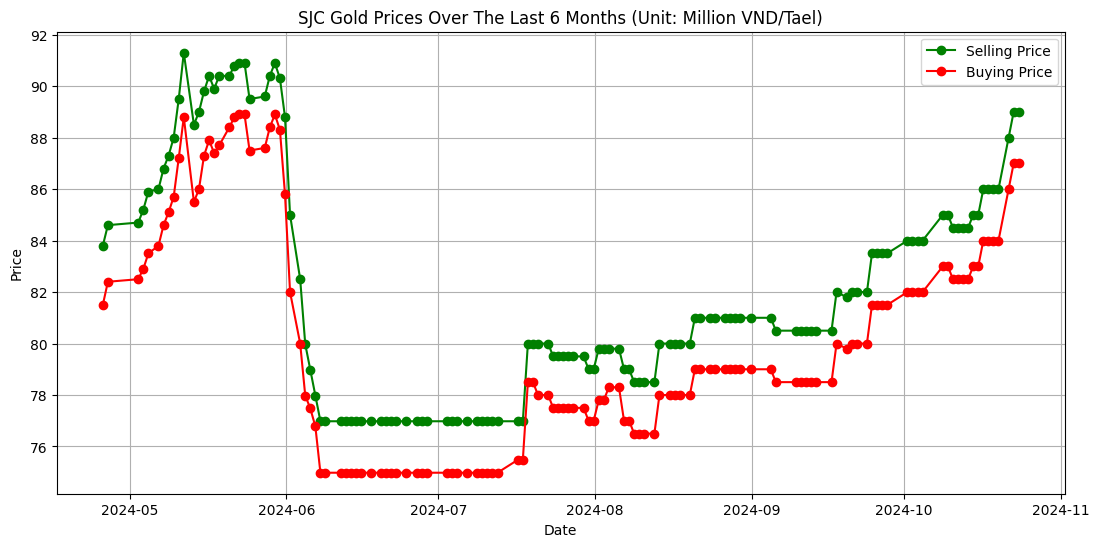

In [31]:
plt.figure(figsize=(13, 6))

plt.plot(df.index, df['Sell'], marker='o', label='Selling Price', color='g')
plt.plot(df.index, df['Buy'], marker='o', label='Buying Price', color='r')

plt.title('SJC Gold Prices Over The Last 6 Months (Unit: Million VND/Tael)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()

Overall, the selling prices of SJC gold was always higher than the buying prices. From late April to late May 2024, SJC gold prices experienced an upward trend in both selling and buying. The peak on May 11th marked a historic high for gold in Vietnam. This was followed by a dramatic fall in early June, a clear sign of significant influence. At that time, the State Bank of Vietnam implemented policies to narrow the gap between domestic and international gold markets. In the following month, these policies stabilized gold prices, though economists were concerned about a potential further drop. From mid-July to now, there has been an overall upward trend, suggesting a variety of complex influences, likely including international factors.


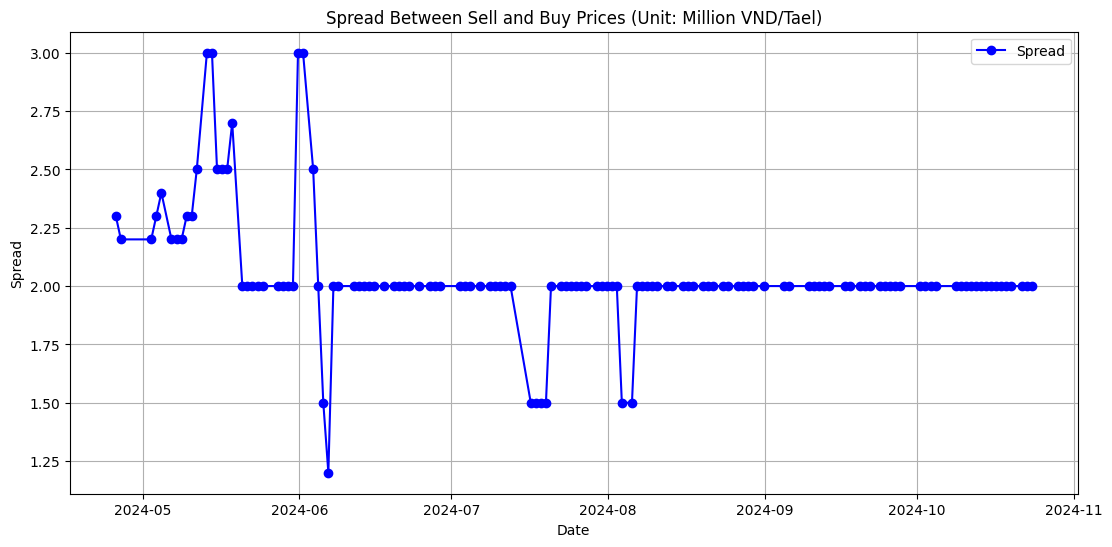

In [33]:
df['Spread'] = df['Sell'] - df['Buy']

plt.figure(figsize=(13, 6))

plt.plot(df.index, df['Spread'], marker='o', label='Spread', color='b')

plt.title('Spread Between Sell and Buy Prices (Unit: Million VND/Tael)')
plt.xlabel('Date')
plt.ylabel('Spread')
plt.legend()
plt.grid(True)
plt.show()

Prior to the State Bank of Vietnam's adjustments, the spread between selling and buying prices of SJC gold showed frequent fluctuations, indicating market volatility. Post-implementation, the spread stabilized at 2 million/tael, demonstrating the positive impact of the policies. The sudden drop in mid-July and early August suggests economic influences; however, the spread remained stable thereafter.

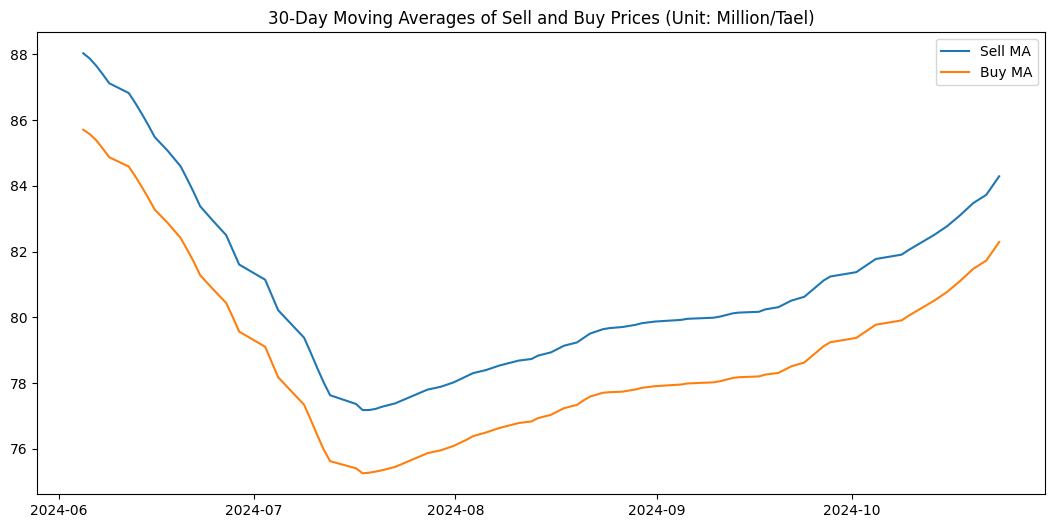

In [35]:
df['Sell_MA'] = df['Sell'].rolling(window=30).mean()  # 30-day moving average
df['Buy_MA'] = df['Buy'].rolling(window=30).mean()

plt.figure(figsize=(13, 6))

plt.plot(df.index, df['Sell_MA'], label='Sell MA')
plt.plot(df.index, df['Buy_MA'], label='Buy MA')

plt.title('30-Day Moving Averages of Sell and Buy Prices (Unit: Million/Tael)')
plt.legend()
plt.show()

This graph highlights the overall trend in gold prices, smoothing out short-term fluctuations using 30-day moving averages.

In [37]:
# We have to reset the index for the following code to work
df.reset_index(inplace=True)

<Figure size 1400x800 with 0 Axes>

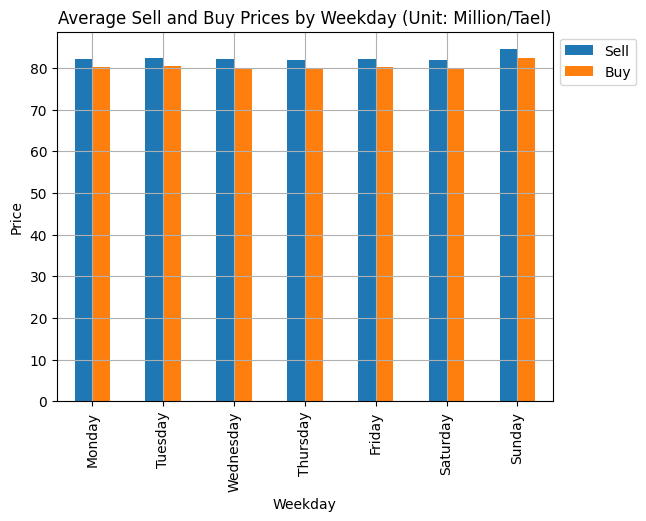

In [38]:
# Group by weekdays
df['Weekday'] = df['Date'].dt.day_name()
weekday_avg = df.groupby('Weekday').agg({'Sell': 'mean', 'Buy': 'mean'}).reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot for weekdays
plt.figure(figsize=(14, 8))
weekday_avg.plot(kind='bar')

plt.title('Average Sell and Buy Prices by Weekday (Unit: Million/Tael)')
plt.xlabel('Weekday')
plt.ylabel('Price')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid()
plt.show()

It’s intriguing to observe that prices on Sundays are slightly higher than on other days.

<Figure size 1400x800 with 0 Axes>

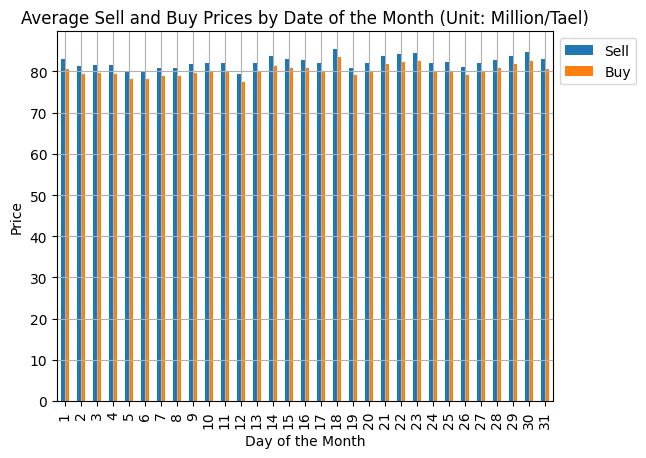

In [40]:
# Group by days of the month
df['Day'] = df['Date'].dt.day
day_avg = df.groupby('Day').agg({'Sell': 'mean', 'Buy': 'mean'})

# Plot for days of the month
plt.figure(figsize=(14, 8))
day_avg.plot(kind='bar')

plt.title('Average Sell and Buy Prices by Date of the Month (Unit: Million/Tael)')
plt.xlabel('Day of the Month')
plt.ylabel('Price')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid()
plt.show()


A small upward trend in prices is noticeable towards the end of the month, but overall, the market maintained a predictable and balanced state, with minimal variation in buy and sell prices across the days.